In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# import graphviz
import pyarrow

# from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set_style("white")
plt.rcParams['figure.dpi'] = 300

In [78]:

file_path = r'C:\Users\wziller\Milwaukee Tool\_Global AME\MSOE\CS5610\M6\csc5610base\GroupProjectM6\Award_Batting_HOF_FE.csv'
Awards_Batting_HoF_df = pd.read_feather(file_path)

Awards_Batting_HoF_df.describe()
# OG
# Awards_Batting_HoF_df = pd.read_feather("Awards_Batting_HoF.feather")

,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,total_RBI,...,total_SF,total_GIDP,max_HR,max_hits,max_SB,total_singles,batting_avg,OBP,SLG,OPS
count,18724.000000,18724.000000,18724.000000,18724.000000,18724.000000,18724.000000,18724.000000,18724.00000,18724.000000,18724.000000,...,18724.000000,18724.000000,18724.000000,18724.000000,18724.000000,18724.000000,16704.000000,16747.000000,16704.000000,16704.000000
mean,5.014847,292.557306,821.013726,110.233390,216.627857,76.078883,36.578936,7.77382,16.192373,99.211280,...,3.789468,12.489746,3.299829,39.441198,4.134426,156.082728,0.190792,0.240878,0.213811,0.452734
std,4.617795,527.807546,1891.249653,291.755375,544.659428,207.432638,95.414644,25.12887,57.666437,270.931057,...,12.846341,36.537840,7.419488,58.048645,10.283106,386.701877,0.119200,0.136246,0.138644,0.262312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,13.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.125000,0.168230,0.131828,0.304944
50%,3.000000,77.000000,71.000000,6.000000,12.000000,4.000000,2.000000,0.00000,0.000000,4.000000,...,0.000000,0.000000,0.000000,8.000000,0.000000,10.000000,0.213052,0.263158,0.232692,0.500000
75%,7.000000,327.000000,605.000000,63.000000,133.000000,40.000000,21.000000,4.00000,4.000000,54.000000,...,0.000000,4.000000,2.000000,58.000000,3.000000,101.000000,0.256410,0.317638,0.294750,0.610403
max,27.000000,5700.000000,21752.000000,3992.000000,7028.000000,3416.000000,1584.000000,618.00000,1146.000000,4152.000000,...,236.000000,630.000000,73.000000,262.000000,138.000000,5286.000000,1.000000,1.000000,2.000000,3.000000


In [79]:
# Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP']] = Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP']].abs()

X = Awards_Batting_HoF_df[[
    'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_doubles', 'total_triples', 'total_home_runs', 'total_RBI',
    'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR',
    'max_hits', 'max_SB'
]]

In [80]:
print(Awards_Batting_HoF_df.columns.tolist())
Awards_Batting_HoF_df.info()

['playerID', 'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits', 'total_walks', 'total_doubles', 'total_triples', 'total_home_runs', 'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB', 'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR', 'max_hits', 'max_SB', 'HOF_status', 'total_singles', 'batting_avg', 'OBP', 'SLG', 'OPS']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18724 entries, 0 to 18723
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   playerID         18724 non-null  object 
 1   years_played     18724 non-null  int64  
 2   total_games      18724 non-null  float64
 3   total_at_bats    18724 non-null  float64
 4   total_runs       18724 non-null  float64
 5   total_hits       18724 non-null  float64
 6   total_walks      18724 non-null  float64
 7   total_doubles    18724 non-null  float64
 8   total_triples    18724 non-null  float64
 9  

In [81]:
Awards_Batting_HoF_df.head()

,playerID,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,...,total_GIDP,max_HR,max_hits,max_SB,HOF_status,total_singles,batting_avg,OBP,SLG,OPS
0,aardsda01,9,331.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.000000,0.000000,0.000000,0.000000
1,aaronha01,23,3298.0,12364.0,2174.0,3771.0,1402.0,624.0,98.0,755.0,...,328.0,47.0,223.0,31.0,True,2294.0,0.304998,0.375781,0.435053,0.810834
2,aaronto01,7,437.0,944.0,102.0,216.0,86.0,42.0,6.0,13.0,...,36.0,8.0,77.0,6.0,False,155.0,0.228814,0.293204,0.262712,0.555916
3,aasedo01,13,448.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.000000,0.000000,0.000000,0.000000
4,abadan01,3,15.0,21.0,1.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,False,2.0,0.095238,0.240000,0.095238,0.335238


In [82]:
#Awards_Batting_HoF_df = Awards_Batting_HoF_df.drop_duplicates(subset=['playerID'])

In [83]:
# OG
# X = Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP']]
X = Awards_Batting_HoF_df[[
    'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_doubles', 'total_triples', 'total_home_runs', 'total_RBI',
    'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR',
    'max_hits', 'max_SB'
]]


y = Awards_Batting_HoF_df['HOF_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_1 = LogisticRegression()
log_model_1.fit(X_train_scaled, y_train)

y_pred = log_model_1.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Reset indices for alignment
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred, index=y_test_reset.index)

# Identify false positives and false negatives
false_positives = y_test_reset[(y_test_reset == 0) & (y_pred_reset == 1)].index
false_negatives = y_test_reset[(y_test_reset == 1) & (y_pred_reset == 0)].index

# Extract player details for false positives and false negatives
false_positive_players = Awards_Batting_HoF_df.loc[false_positives, ['playerID', 'HOF_status']]
false_negative_players = Awards_Batting_HoF_df.loc[false_negatives, ['playerID', 'HOF_status']]

# Display the results
print("False Positives:")
print(false_positive_players)

print("\nFalse Negatives:")
print(false_negative_players)

Confusion Matrix:
[[3692    5]
 [  29   19]]

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      3697
        True       0.79      0.40      0.53        48

    accuracy                           0.99      3745
   macro avg       0.89      0.70      0.76      3745
weighted avg       0.99      0.99      0.99      3745

False Positives:
       playerID  HOF_status
308   anderbr04       False
1194  bernajo01       False
1997  brownll01       False
2339  cabrace01       False
3482  cottsne01       False

False Negatives:
       playerID  HOF_status
105   adkinhe01       False
194   allenfr01       False
223   allisdo01       False
256   altizda01       False
282   alvorbi01       False
351   andreel01       False
445   arnovmo01       False
463   asbjoca01       False
526   averiea01        True
797   baronst01       False
966   bearega01       False
1125  benneda01       False
1253  bevacku01       False
1890  bro

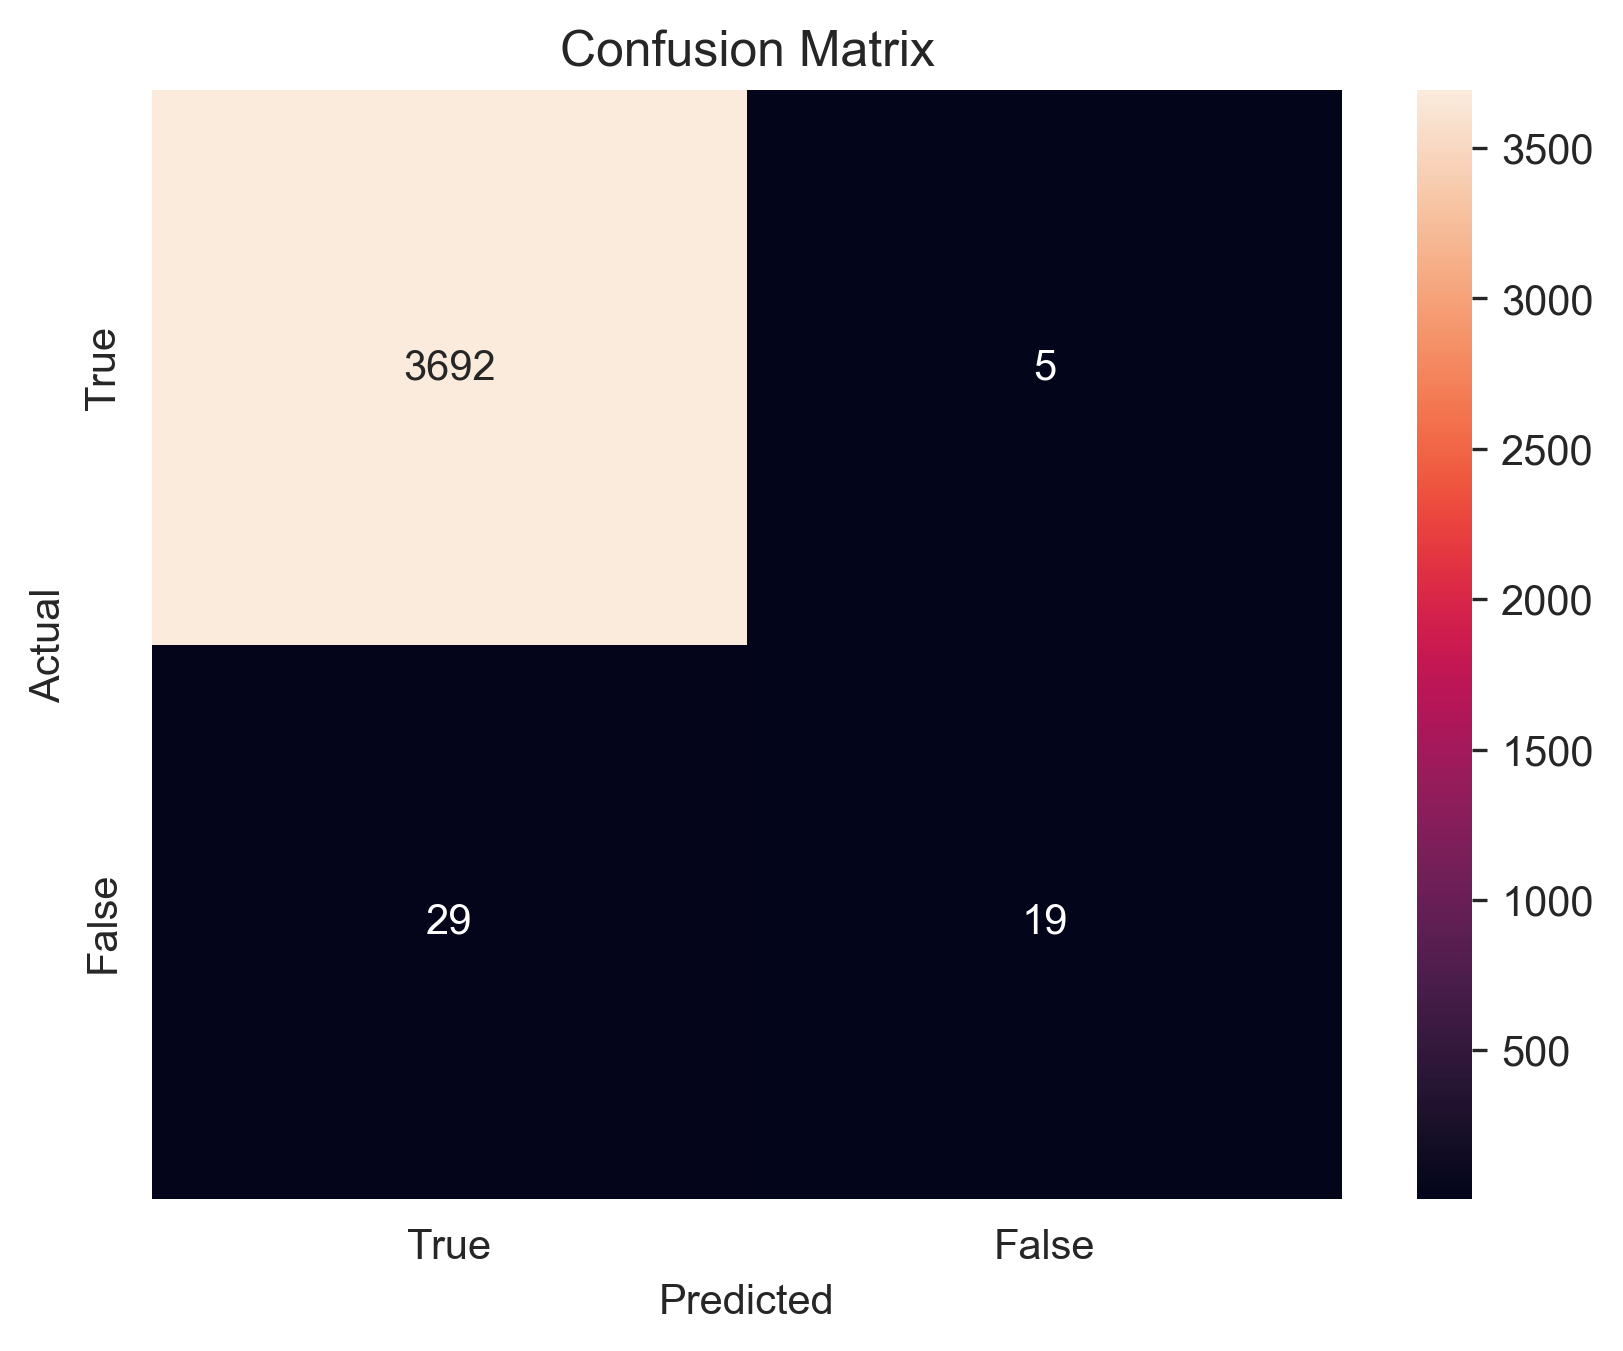

<Figure size 1920x1440 with 0 Axes>

In [84]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_1.png')

In [85]:
importance = log_model_1.coef_[0]  
feature_names = X.columns  

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df)

            Feature  Importance  Absolute Importance
18         max_hits   -2.619693             2.619693
2        total_runs    1.722870             1.722870
0       total_games    1.282295             1.282295
4     total_doubles   -1.009339             1.009339
7         total_RBI    0.859703             0.859703
17           max_HR   -0.752712             0.752712
1     total_at_bats    0.750267             0.750267
11         total_SO    0.517287             0.517287
10         total_BB   -0.476675             0.476675
19           max_SB   -0.475011             0.475011
14         total_SH    0.314492             0.314492
13        total_HBP   -0.242799             0.242799
8          total_SB    0.225761             0.225761
9          total_CS   -0.188786             0.188786
5     total_triples    0.099596             0.099596
12        total_IBB    0.099393             0.099393
15         total_SF   -0.076601             0.076601
16       total_GIDP   -0.071136             0.

Feature Engineering career stats rather than season stats.

Awards_Batting_HoF_df['Batting_df_G_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_G'].transform('mean')
Awards_Batting_HoF_df['Batting_df_G_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_G'].transform('sum')

Awards_Batting_HoF_df['Batting_df_AB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_AB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_AB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_AB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_R_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_R'].transform('mean')
Awards_Batting_HoF_df['Batting_df_R_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_R'].transform('sum')

Awards_Batting_HoF_df['Batting_df_H_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_H'].transform('mean')
Awards_Batting_HoF_df['Batting_df_H_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_H'].transform('sum')

Awards_Batting_HoF_df['Batting_df_2B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_2B'].transform('mean')
Awards_Batting_HoF_df['Batting_df_2B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_2B'].transform('sum')

Awards_Batting_HoF_df['Batting_df_3B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_3B'].transform('mean')
Awards_Batting_HoF_df['Batting_df_3B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_3B'].transform('sum')

Awards_Batting_HoF_df['Batting_df_HR_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HR'].transform('mean')
Awards_Batting_HoF_df['Batting_df_HR_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HR'].transform('sum')

Awards_Batting_HoF_df['Batting_df_RBI_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_RBI'].transform('mean')
Awards_Batting_HoF_df['Batting_df_RBI_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_RBI'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_CS_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_CS'].transform('mean')
Awards_Batting_HoF_df['Batting_df_CS_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_CS'].transform('sum')

Awards_Batting_HoF_df['Batting_df_BB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_BB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_BB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_BB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SO_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SO'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SO_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SO'].transform('sum')

Awards_Batting_HoF_df['Batting_df_IBB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_IBB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_IBB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_IBB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_HBP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HBP'].transform('mean')
Awards_Batting_HoF_df['Batting_df_HBP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HBP'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SH_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SH'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SH_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SH'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SF_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SF'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SF_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SF'].transform('sum')

Awards_Batting_HoF_df['Batting_df_GIDP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_GIDP'].transform('mean')
Awards_Batting_HoF_df['Batting_df_GIDP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_GIDP'].transform('sum')

In [ ]:
print(Awards_Batting_HoF_df.columns.tolist())

['playerID', 'AllstarFull_df_yearID', 'AwardsPlayers_df_yearID', 'Batting_df_yearID', 'Batting_df_stint', 'Batting_df_teamID', 'Batting_df_lgID', 'Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_yearID', 'BattingPost_df_round', 'BattingPost_df_teamID', 'BattingPost_df_lgID', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP', 'HallOfFame_df_yearid', 'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_

In [ ]:
reg_seas_df = Awards_Batting_HoF_df[['playerID' ,'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total']]

In [ ]:
reg_seas_df = reg_seas_df.drop_duplicates(subset='playerID')
reg_seas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 10056146
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   playerID                499 non-null    category
 1   HallOfFame_df_inducted  499 non-null    bool    
 2   Batting_df_G_avg        499 non-null    float64 
 3   Batting_df_G_total      499 non-null    int64   
 4   Batting_df_AB_avg       499 non-null    float64 
 5   Batting_df_AB_total     499 non-null    int64   
 6   Batting_df_R_avg        499 non-null    float64 
 7   Batting_df_R_total      499 non-null    int64   
 8   Batting_df_H_avg        499 non-null    float64 
 9   Batting_df_H_total      499 non-null    int64   
 10  Batting_df_2B_avg       499 non-null    float64 
 11  Batting_df_2B_total     499 non-null    int64   
 12  Batting_df_3B_avg       499 non-null    float64 
 13  Batting_df_3B_total     499 non-null    int64   
 14  Batting_df_HR_avg       49

In [ ]:
print(reg_seas_df.columns.tolist())

['playerID', 'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total']


In [ ]:
X = reg_seas_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total']]
y = reg_seas_df['HallOfFame_df_inducted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_2 = LogisticRegression()
log_model_2.fit(X_train_scaled, y_train)

y_pred = log_model_2.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[89  0]
 [ 9  2]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95        89
        True       1.00      0.18      0.31        11

    accuracy                           0.91       100
   macro avg       0.95      0.59      0.63       100
weighted avg       0.92      0.91      0.88       100



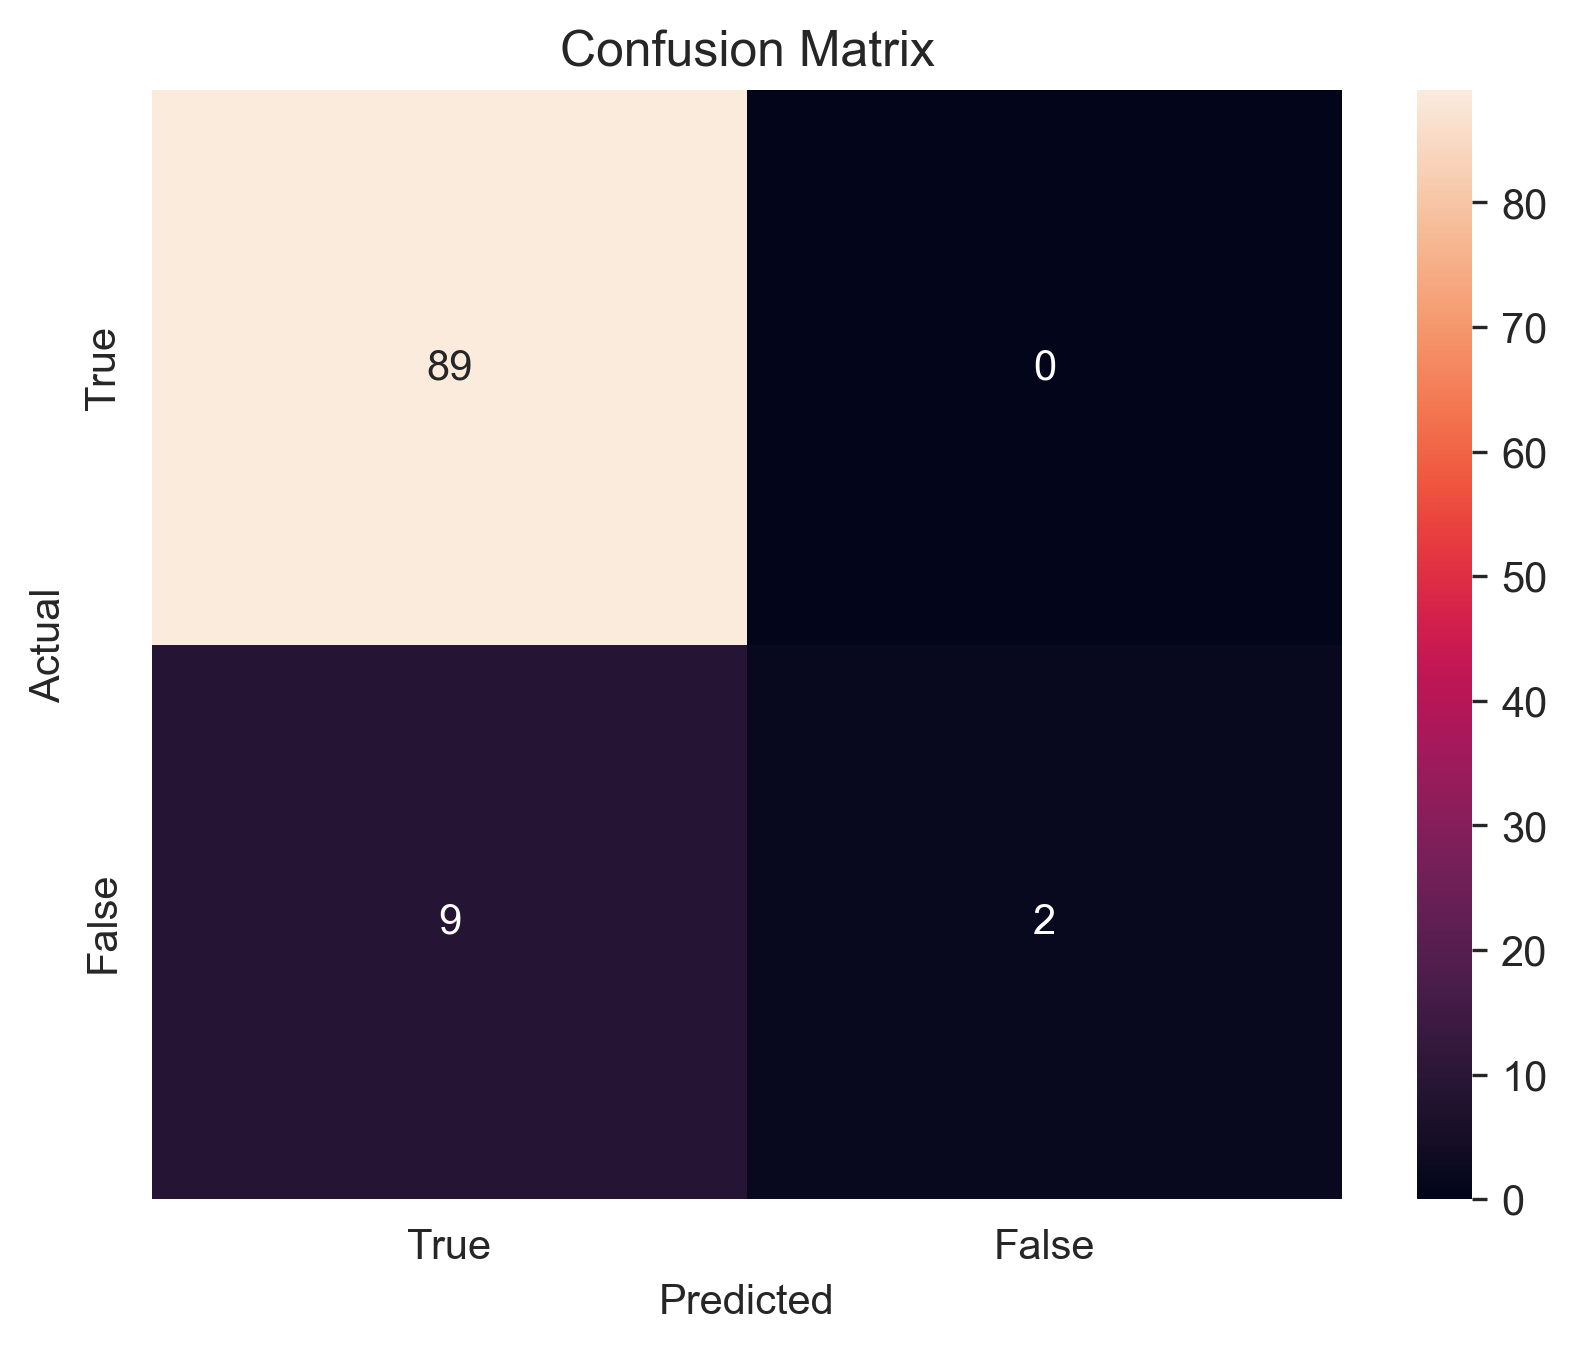

<Figure size 1920x1440 with 0 Axes>

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_2.png')

In [ ]:
importance = log_model_2.coef_[0]  
feature_names = X.columns  

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df)

                  Feature  Importance  Absolute Importance
0        Batting_df_G_avg   -1.103126             1.103126
6        Batting_df_H_avg   -1.092026             1.092026
23    Batting_df_SO_total    0.952608             0.952608
27   Batting_df_HBP_total   -0.910172             0.910172
3     Batting_df_AB_total    0.873737             0.873737
13    Batting_df_HR_total    0.715998             0.715998
21    Batting_df_BB_total    0.610891             0.610891
2       Batting_df_AB_avg   -0.610742             0.610742
31    Batting_df_SF_total    0.574363             0.574363
29    Batting_df_SH_total    0.463377             0.463377
7      Batting_df_H_total   -0.416339             0.416339
32    Batting_df_GIDP_avg    0.394235             0.394235
26     Batting_df_HBP_avg    0.388605             0.388605
14     Batting_df_RBI_avg   -0.382161             0.382161
33  Batting_df_GIDP_total    0.354511             0.354511
24     Batting_df_IBB_avg    0.324229             0.3242

Feature engineering in post season stats

In [ ]:
Awards_Batting_HoF_df['BattingPost_df_G_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_G'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_G_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_G'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_AB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_AB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_AB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_AB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_R_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_R'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_R_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_R'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_H_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_H'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_H_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_H'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_2B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_2B'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_2B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_2B'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_3B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_3B'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_3B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_3B'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_HR_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HR'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_HR_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HR'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_RBI_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_RBI'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_RBI_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_RBI'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_CS_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_CS'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_CS_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_CS'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_BB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_BB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_BB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_BB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SO_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SO'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SO_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SO'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_IBB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_IBB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_IBB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_IBB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_HBP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HBP'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_HBP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HBP'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SH_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SH'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SH_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SH'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SF_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SF_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_GIDP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_GIDP'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_GIDP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_GIDP'].transform('sum')

C:\Users\cltro\AppData\Local\Temp\ipykernel_20736\2908066783.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Awards_Batting_HoF_df['BattingPost_df_SF_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('mean')
C:\Users\cltro\AppData\Local\Temp\ipykernel_20736\2908066783.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Awards_Batting_HoF_df['BattingPost_df_SF_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('sum')
C:\Users\cltr

In [ ]:
print(Awards_Batting_HoF_df.columns.tolist())

['playerID', 'AllstarFull_df_yearID', 'AwardsPlayers_df_yearID', 'Batting_df_yearID', 'Batting_df_stint', 'Batting_df_teamID', 'Batting_df_lgID', 'Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_yearID', 'BattingPost_df_round', 'BattingPost_df_teamID', 'BattingPost_df_lgID', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP', 'HallOfFame_df_yearid', 'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_

In [ ]:
eng_stats_df = Awards_Batting_HoF_df[['playerID','HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]

In [ ]:
eng_stats_df = eng_stats_df.drop_duplicates(subset='playerID')
eng_stats_df.to_feather('eng_stats_df.feather')

In [ ]:
X = eng_stats_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]
y = eng_stats_df['HallOfFame_df_inducted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_3 = LogisticRegression()
log_model_3.fit(X_train_scaled, y_train)

y_pred = log_model_3.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[89  0]
 [ 9  2]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95        89
        True       1.00      0.18      0.31        11

    accuracy                           0.91       100
   macro avg       0.95      0.59      0.63       100
weighted avg       0.92      0.91      0.88       100



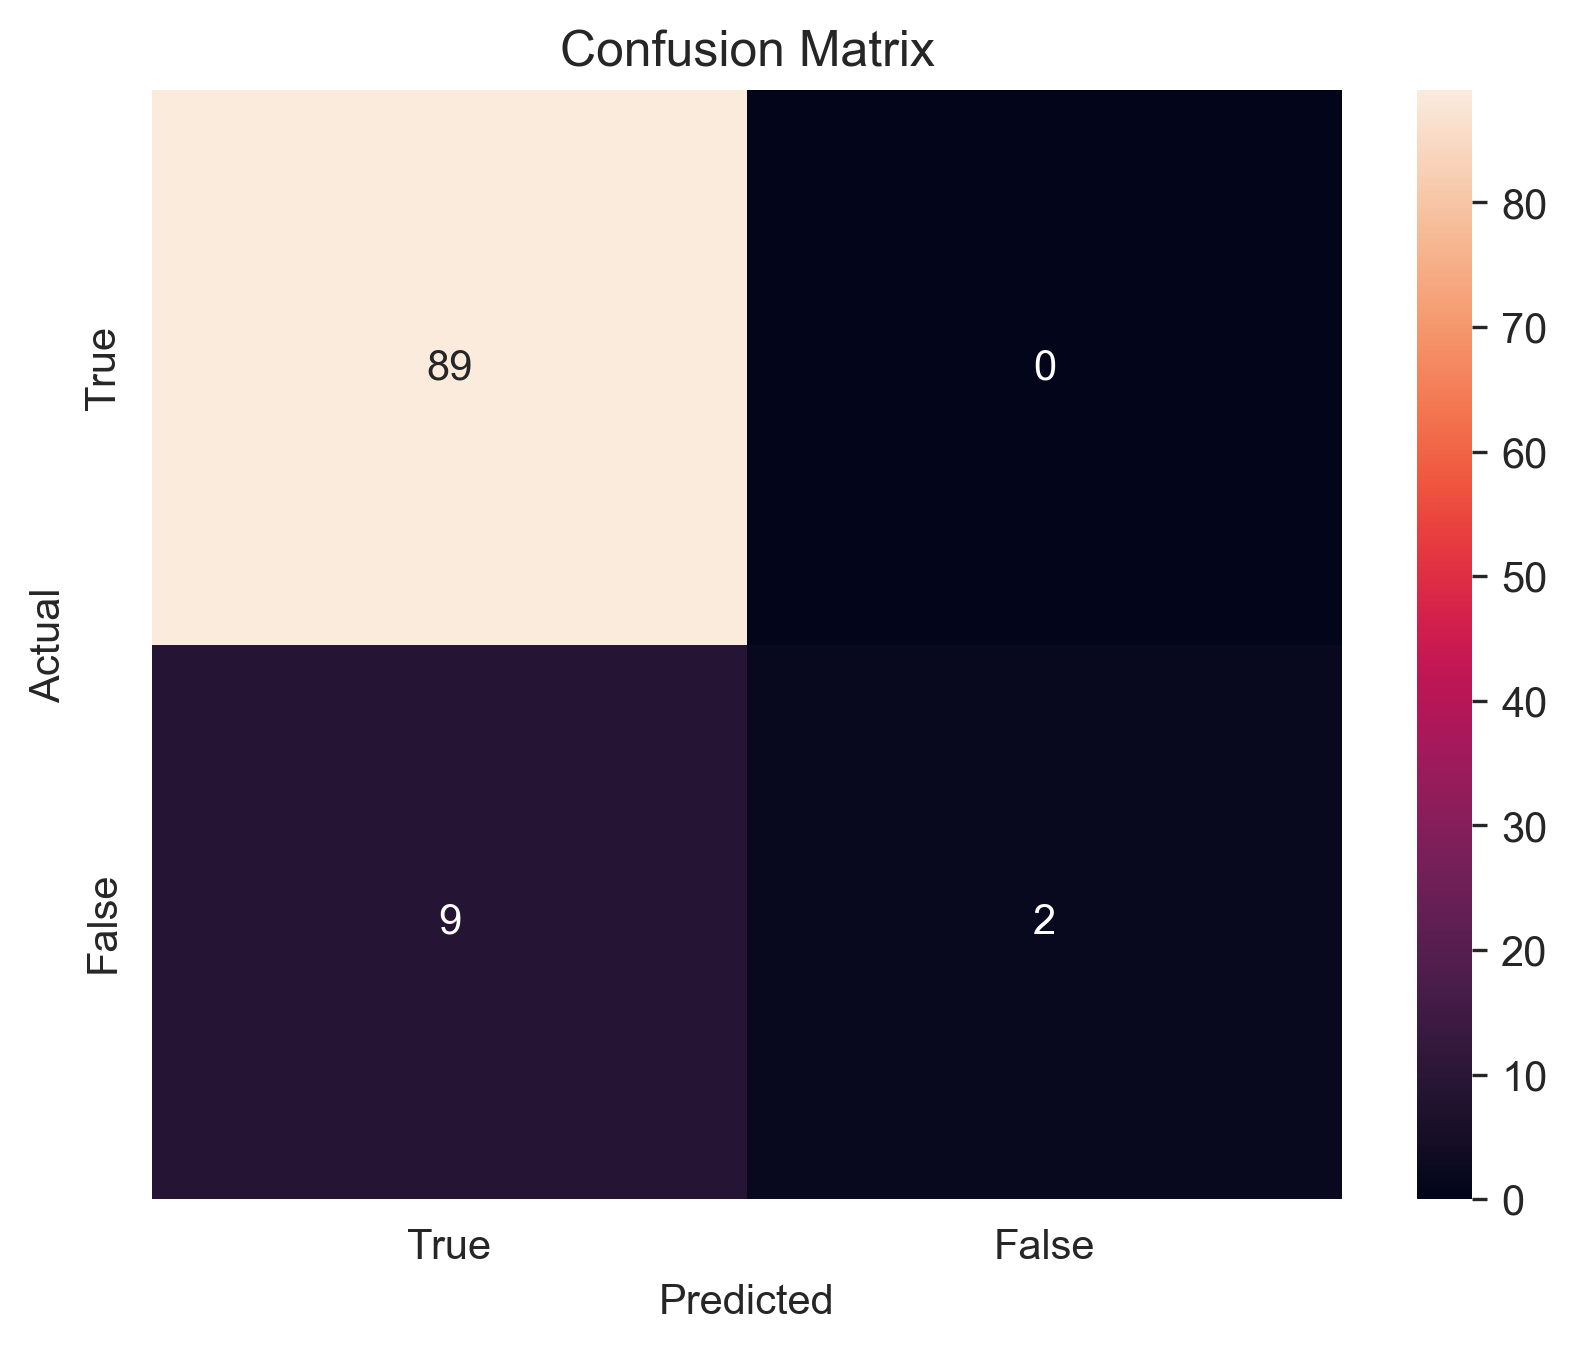

<Figure size 1920x1440 with 0 Axes>

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_3.png')

In [ ]:
importance = log_model_3.coef_[0]  
feature_names = X.columns  


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df.head(15))

                     Feature  Importance  Absolute Importance
6           Batting_df_H_avg   -1.325580             1.325580
3        Batting_df_AB_total    0.968851             0.968851
23       Batting_df_SO_total    0.892550             0.892550
27      Batting_df_HBP_total   -0.855013             0.855013
0           Batting_df_G_avg   -0.850449             0.850449
7         Batting_df_H_total   -0.827404             0.827404
13       Batting_df_HR_total    0.779090             0.779090
21       Batting_df_BB_total    0.774566             0.774566
41    BattingPost_df_H_total    0.735224             0.735224
50     BattingPost_df_SB_avg    0.706182             0.706182
51   BattingPost_df_SB_total   -0.664837             0.664837
59  BattingPost_df_IBB_total    0.663234             0.663234
31       Batting_df_SF_total    0.636577             0.636577
66   BattingPost_df_GIDP_avg   -0.595507             0.595507
2          Batting_df_AB_avg   -0.542426             0.542426
